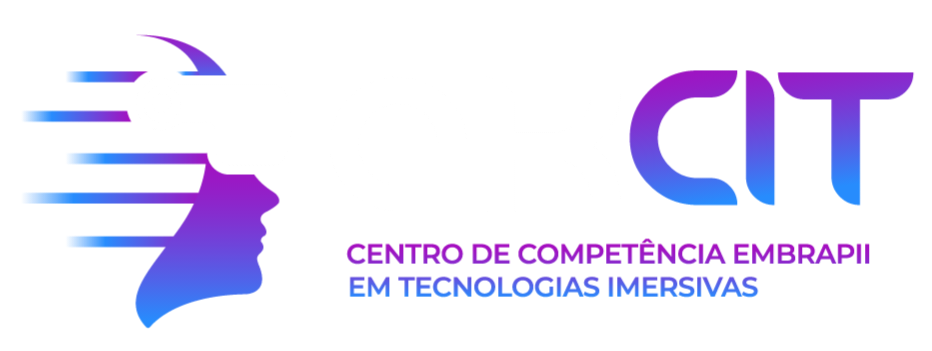


# Identificação

**Microcurso:** Python para Processamento de Dados

**Docente:** Me. Otávio Calaça Xavier

# Objetivos de Aprendizagem

1. **Uso do NumPy**: realizar cálculos de estatísticas descritivas para as variáveis idade e tarifas.

1. **Utilização do Pandas**: limpar o *dataset* preenchendo dados faltantes e filtrar informações para análises específicas. Explorar a agregação de dados para entender as taxas de sobrevivência por diferentes categorias.

1. **Visualizações com Matplotlib e Seaborn**: criar gráficos que ilustrem a distribuição da idade dos passageiros, as taxas de sobrevivência por classe e sexo, entre outras visualizações relevantes.


# Introdução

No estudo de caso detalhado que será apresentado neste *notebook*, utilizaremos o *dataset* Titanic, um conjunto de dados amplamente explorado na comunidade de ciência de dados. Este *dataset* contém informações demográficas e de viagem sobre os passageiros a bordo do Titanic, que afundou em sua viagem inaugural em 1912. As variáveis incluem idade, sexo, classe da cabine, tarifa paga, sobrevivência, entre outras.

O *dataset* Titanic é particularmente interessante para análise porque contém uma mistura de variáveis numéricas e categóricas e apresenta um desafio *real-world* para prever a sobrevivência, tornando-se um caso clássico para métodos de classificação em aprendizado de máquina. Este estudo de caso não apenas reforçará a aplicação prática das técnicas discutidas, mas também proporcionará uma oportunidade de entender como *insights* podem ser extraídos de um evento histórico trágico utilizando ferramentas modernas de análise de dados.

Todas as estruturas, funções e métodos utilizados nesse *notebook* estão detalhadas nas Unidades do *Ebook*. É de forte recomendação que as Unidades anteriores sejam estudadas e entendidas antes de começar esta Unidade.



## Configuração Inicial e Carregamento dos Dados


O *dataset* do Titanic será carregado a partir de um arquivo CSV presente no repositório `seaborn-data`. Todos os métodos e estruturas utilizadas foram estudados nas Unidades anteriores. Este é apenas um estudo de caso com exemplo prático, utilizando um conjunto de dados realista.

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset Titanic
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

# Exibir as primeiras linhas do dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Dicionário de Dados do *Dataset* Titanic

- **survived**: indica se o passageiro sobreviveu ao desastre do Titanic.
  - 0 = Não
  - 1 = Sim

- **pclass**: classe do bilhete do passageiro, um indicador do status socioeconômico.
  - 1 = Primeira Classe
  - 2 = Segunda Classe
  - 3 = Terceira Classe

- **sex**: sexo do passageiro.
  - male = Masculino
  - female = Feminino

- **age**: idade do passageiro em anos.

- **sibsp**: número de irmãos/cônjuges a bordo do Titanic.

- **parch**: número de pais/filhos a bordo do Titanic.

- **fare**: tarifa paga pelo passageiro.

- **embarked**: código do porto de embarque do passageiro.
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

- **class**: categoria da classe do passageiro, similar a **pclass**.
  - First = Primeira Classe
  - Second = Segunda Classe
  - Third = Terceira Classe

- **who**: descrição do passageiro.
  - child = Criança
  - man = Homem
  - woman = Mulher

- **adult_male**: indica se o passageiro é um homem adulto.
  - True = Sim
  - False = Não

- **deck**: letra que indica o deck da cabine do passageiro.

- **embark_town**: nome da cidade de embarque do passageiro.
  - Cherbourg
  - Queenstown
  - Southampton

- **alive**: estado de sobrevivência do passageiro em formato de texto.
  - yes = Sim
  - no = Não

- **alone**: indica se o passageiro estava viajando sozinho.
  - True = Sim
  - False = Não

## Verificar tipos dos atributos

In [2]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

## Forma e dimensões do *dataset*

In [3]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", titanic.shape[0], "instâncias e ", titanic.shape[1], " atributos.")

O dataset contém  891 instâncias e  15  atributos.


# Descrever Estatisticamente os Dados

Nesta seção, realizaremos uma descrição estatística do *dataset* Titanic. Isso inclui obter medidas de tendência central, dispersão e a distribuição das variáveis numéricas e categóricas. A descrição estatística é essencial para entender o escopo dos dados, identificar possíveis *outliers* e planejar os passos subsequentes para a análise dos dados mais detalhada.

In [4]:
# Exibir estatísticas descritivas para variáveis numéricas
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Exibir estatísticas descritivas para variáveis categóricas
titanic.describe(include=['O'])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [6]:
# Calcular e exibir a moda para as variáveis categóricas
moda_categoricas = titanic[['sex', 'embarked', 'class']].mode()
moda_categoricas

,sex,embarked,class
0,male,S,Third


# Limpeza de Dados

A limpeza dos dados é uma etapa crucial antes de qualquer análise aprofundada. Nesta seção, focaremos na preparação do *dataset* Titanic, tratando dados faltantes, removendo duplicatas e ajustando tipos de dados quando necessário. Esta limpeza ajudará a garantir que as análises subsequentes sejam baseadas em dados precisos e representativos.


**Exibição de informações iniciais:** Utilizamos `titanic.info()` para obter um resumo das colunas, tipos de dados e a presença de valores faltantes.

Na saída a seguir, é possivel observar que foi informado o tipo (`Dtype`) dos dados de cada uma das colunas, bem como uma coluna de nome `Non-Null Count`. Essa coluna apresenta a quantidade de entradas em cada coluna que possuem valores não nulos. Essa informação é especialmente relevante para a limpeza de dados. Por exemplo, por meio dessa análise, pode-se ver que a coluna `deck` possui apenas 203 entradas não nulas de um total de 891. Um forte indício de que essa coluna pode ser removida, pois não descreve razoavelmente a população presente no conjunto de dados.

In [7]:
# Exibir informações iniciais para identificar dados faltantes e tipos de dados
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


**Conversão de tipos de dados:** a coluna *fare* (tarifa paga pelo passageiro) é explicitamente convertida para tipo `float32`, um tamanho menor que o `float64`(padrão), ocupando metade da memória. Útil para quando não se deseja precisão com muitas casas decimais.

In [8]:
# Converter o tipo de dado da coluna 'fare' para float32, se necessário
titanic['fare'] = titanic['fare'].astype(np.float32)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float32
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float32(1), float64(1), int64(4), object(7)
memory usage: 88.9+ KB


## Tratamento de Dados Faltantes e Duplicados:

* **Idades:** as idades faltantes são substituídas pela média das idades existentes, o que é uma prática comum para manter a distribuição geral.


In [9]:
# Mostrando dados faltantes na coluna 'age' (idades)
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.458300,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.000000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.225000,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.225000,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.879200,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.229200,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.550003,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.500000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.895800,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Substituir dados faltantes na coluna 'age' pela média das idades
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

C:\Users\saothalm\AppData\Local\Temp\ipykernel_35444\3711371641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)


In [11]:
# Mostrando dados faltantes na coluna 'age' (idades)
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


* **Porto de Embarque:** dados faltantes na coluna *embarked* são substituídos pelo valor mais comum, que é o porto de embarque que aparece com maior frequência.

In [12]:
# Mostrando dados faltantes na coluna 'embarked' (porto de embarque)
titanic[titanic['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [13]:
# Substituir dados faltantes na coluna 'embarked' pelo porto mais comum
most_common_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(most_common_embarked, inplace=True)

C:\Users\saothalm\AppData\Local\Temp\ipykernel_35444\2938851806.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(most_common_embarked, inplace=True)


In [14]:
# Mostrando dados faltantes na coluna 'embarked' (porto de embarque)
titanic[titanic['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


* **Remoção de Colunas:** a coluna *deck* é removida devido ao grande número de dados faltantes, o que pode comprometer a qualidade das análises.

In [15]:
# Mostrando dados faltantes na coluna 'deck' (deck da cabine do passageiro)
titanic[titanic['deck'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.699118,0,0,8.458300,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.000000,3,1,21.075001,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.050000,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.000000,0,5,29.125000,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.000000,0,0,13.000000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,29.699118,1,2,23.450001,S,Third,woman,False,NaN,Southampton,no,False


In [16]:
# Remover a coluna 'deck', pois contém muitos valores faltantes
titanic.drop('deck', axis=1, inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283302,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.099998,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.000000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.000000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.450001,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.000000,C,First,man,True,Cherbourg,yes,True


* **Remoção de duplicatas:** linhas duplicadas são removidas para evitar distorções nas análises estatísticas.

In [17]:
# Mostrando linhas duplicadas do dataframe titanic
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,Southampton,no,True


In [18]:
# Remover linhas duplicadas
titanic.drop_duplicates(inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283302,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.099998,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.125000,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.000000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.450001,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.000000,C,First,man,True,Cherbourg,yes,True


# Análise de Correlações e Proporções

Nesta seção, analisaremos as correlações entre as variáveis do *dataset* Titanic e as proporções significativas que podem indicar fatores influentes na sobrevivência dos passageiros. Utilizaremos técnicas de visualização para ilustrar essas relações, facilitando a identificação de padrões e *insights*.


## Calcular Correlações

Uma das ferramentas mais utilizadas para visualização de correlações entre variáveis é o gráfico de calor. Este gráfico é apresentado em forma de matriz quadrada, em que cada linha, e suas respectivas colunas, representam uma variável. Assim, a coluna 0 representa a mesma variável que a linha 0 (`survived` no exemplo abaixo). O valor apresentado nas células da matriz diz a correlação entre as variáveis em questão. Assim, é correto afirmar que o triangular inferior é igual ao triangular superior da matriz. O gráfico de calor é interessante, pois facilita a visualização utilizando cores mais escuras para correlações diretas mais fortes e cores mais claras para correlações indiretas mais fortes.

No gráfico a seguir, é possível observar nas células `5x0` e `0x5` o valor `0.25`, que demonstra uma correlação importante entre a taxa paga (`fare`) e a sobrevivência do passageiro (`survived`). Uma correlação ainda mais expressiva é apresentada nas células `1x0` e `0x1`, com o valor `-0.34`. Este valor indica uma correlação inversa entre a classe e a sobrevivência do passageiro, ou seja, passageiros de classes menores (primeira classe, por exemplo) tiveram maior sobrevivência. A maior correlação apresentada no conjunto de dados, todavia, é inversa entre `sibsp` e `alone`(`-0,61`), indicando que pessoas com irmãos/cônjuges a bordo do Titanic não estavam viajando sozinhas.

<Axes: >

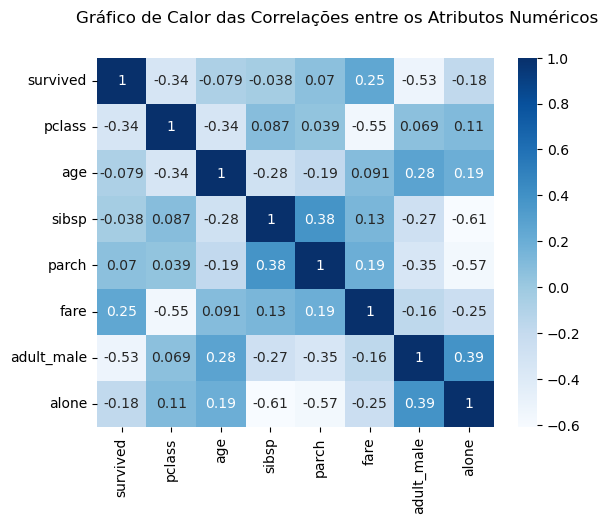

In [19]:
# Somente atributos numéricos são considerados
plt.suptitle("Gráfico de Calor das Correlações entre os Atributos Numéricos")
numericos = titanic.select_dtypes(include=['int', 'float', 'bool'])
sns.heatmap(numericos.corr(), annot=True, cmap='Blues')

## Análisar Proporções

### Homens x Mulheres

Os resultados a seguir mostram que apenas 21,72% dos homens sobreviveram. No caso das mulheres, 73,97% sobreviveram. Isso indica um reflexo da abordagem costumeira da época de salvar mulheres primeiro.

Nos códigos, inicialmente filtramos (com `loc`) o *DataFrame* pelo gênero (`titanic['sex'] == 'male'` ou `titanic['sex'] == 'female'`), selecionando apenas a coluna `survived`. Em seguida, contamos (`count()`) o total de pessoas daquele gênero e os totais para cada valor em `survived` (`value_counts()`). Por fim, as porcentagens são calculadas.

In [20]:
# Filtrando apenas a coluna 'survived' para homens
homens = titanic.loc[titanic['sex'] == 'male', 'survived']
homens

0      0
4      0
5      0
6      0
7      0
      ..
876    0
881    0
883    0
889    1
890    0
Name: survived, Length: 488, dtype: int64

In [21]:
# Porcentagem de sobrevivência de homens
totalHomens = homens.count()
(homens.value_counts() / totalHomens) * 100

survived
0    78.278689
1    21.721311
Name: count, dtype: float64

In [22]:
# Filtrando apenas a coluna 'survived' para mulheres
mulheres = titanic.loc[titanic['sex'] == 'female', 'survived']
mulheres

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: survived, Length: 292, dtype: int64

In [23]:
# Porcentagem de sobrevivência de mulheres
totalMulheres = mulheres.count()
(mulheres.value_counts() / totalMulheres) * 100

survived
1    73.972603
0    26.027397
Name: count, dtype: float64

### Crianças x Adultos

Utilizando a mesma abordagem da análise de sobrevivência de mulheres e homens, os códigos abaixo realizam a filtragem por idade, considerando pessoas com 17 anos ou menos como crianças e as demais como adultos. Nota-se que mais da metade das crianças (54,55%) foram salvas, enquanto apenas 39,10% dos adultos sobreviveram. Ainda que mais frágeis, a maior sobrevivência das crianças talvez seja um indício da abordagem comum à época de salvar crianças primeiro.

In [24]:
# Porcentagem de sobrevivência de crianças e adolescentes (<= 17 anos)
criancas = titanic.loc[titanic['age'] <= 17, 'survived']
totalCriancas = criancas.count()
(criancas.value_counts() / totalCriancas) * 100

survived
1    54.545455
0    45.454545
Name: count, dtype: float64

In [25]:
# Porcentagem de sobrevivência de adultos (> 17)
adultos = titanic.loc[titanic['age'] > 17, 'survived']
totalAdultos = adultos.count()
(adultos.value_counts() / totalAdultos) * 100

survived
0    60.895522
1    39.104478
Name: count, dtype: float64

### 1º Classe x 2º Classe x 3º Classe

Na comparação das classes, utilizando a mesma abordagem das comparações anteriores, também é possível identificar um padrão. Na primeira classe, 63,68% das pessoas sobreviveram. Já a segunda classe obteve uma sobrevivência de 50,61%. Por fim, na terceira classe, apenas 25,74% dos passageiros sobreviveram. Esses dados apresentam uma clara importância da classe em relação à sobrevivência dos passageiros.

In [26]:
# Porcentagem de sobrevivência na primeira classe
total1classe = titanic.loc[titanic['pclass'] == 1, 'survived'].count()
(titanic.loc[titanic['pclass'] == 1, 'survived'].value_counts() / total1classe) * 100

survived
1    63.679245
0    36.320755
Name: count, dtype: float64

In [27]:
# Porcentagem de sobrevivência na segunda classe
total2classe = titanic.loc[titanic['pclass'] == 2, 'survived'].count()
(titanic.loc[titanic['pclass'] == 2, 'survived'].value_counts() / total2classe) * 100

survived
1    50.609756
0    49.390244
Name: count, dtype: float64

In [28]:
# Porcentagem de sobrevivência na terceira classe
total3classe = titanic.loc[titanic['pclass'] == 3, 'survived'].count()
(titanic.loc[titanic['pclass'] == 3, 'survived'].value_counts() / total3classe) * 100

survived
0    74.257426
1    25.742574
Name: count, dtype: float64

### Tabelas Dinâmicas ou Pivô

Nos exemplos a seguir, são apresentadas análises semelhantes às anteriores mas, agora, utilizando tabelas pivô. No primeiro exemplo, `pivot_class`, observa-se as médias de sobrevivência em cada classe (os mesmos valores obtidos anteriormente). Já no segundo exemplo, `pivot_sex` a tabela pivô apresenta as médias dos valores de sobrevivência para cada gênero, indicando, como anteriormente, que 73,97% das mulheres e apenas 21,72% dos homens sobreviveram. Por fim, `pivot_embarked` apresenta que houve uma sobrevivencia maior daqueles que embarcaram em Cherbourg (`C`) com um total de 58,06%. Em seguida, está Southampton (`S`), com 37,39% e Queenstown (`Q`) com 34,48%.

In [29]:
# Criar uma pivot table para explorar a relação entre 'survived' e outras variáveis categóricas
pivot_class = pd.pivot_table(titanic, values='survived', index='class', aggfunc='mean')
display(pivot_class)

pivot_sex = pd.pivot_table(titanic, values='survived', index='sex', aggfunc='mean')
display(pivot_sex)

pivot_embarked = pd.pivot_table(titanic, values='survived', index='embarked', aggfunc='mean')
display(pivot_embarked)

,survived
class,
First,0.636792
Second,0.506098
Third,0.257426


,survived
sex,
female,0.739726
male,0.217213


,survived
embarked,
C,0.580645
Q,0.344828
S,0.373898


# Análise Por Meio de Visualização de Dados

Visualizar dados é crucial para entender complexidades e extrair *insights* significativos. Nesta seção, utilizaremos gráficos para explorar diversas facetas do *dataset* Titanic, focando em distribuições, relações e padrões que podem ajudar a elucidar fatores impactantes na sobrevivência dos passageiros.

## Análises em Relação à Idade

Nos gráficos a seguir, é possível observar que a grande maioria dos passageiros possuía idades entre 20 e 40 anos. Já no gráfico de violino, nota-se uma maior ocorrência de sobreviventes entre as crianças.

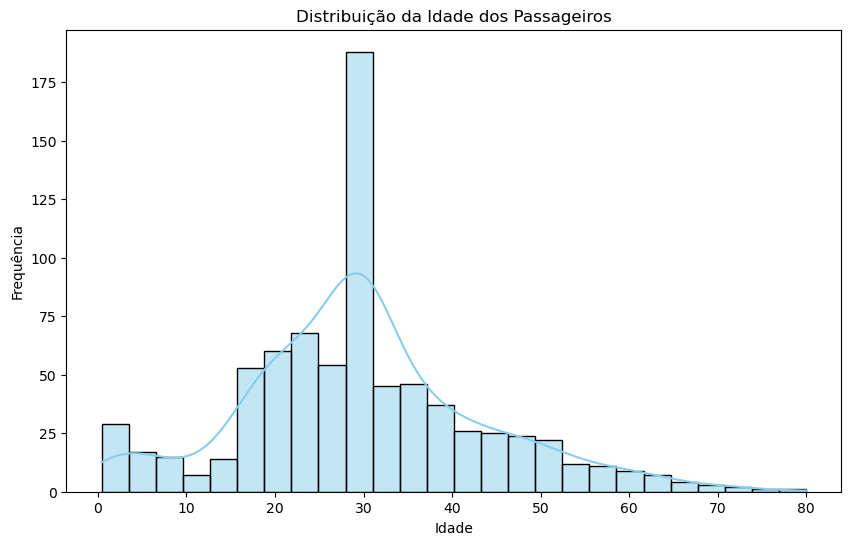

In [30]:
# Distribuição da Idade
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'].dropna(), kde=True, color="skyblue")
plt.title('Distribuição da Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

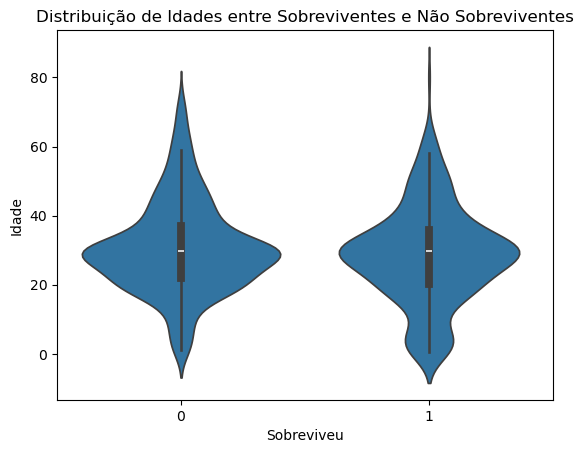

In [31]:
sns.violinplot(x='survived', y='age', data=titanic)
plt.title('Distribuição de Idades entre Sobreviventes e Não Sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Idade')
plt.show()

## Análise em relação à tarifa paga

Nos gráficos a seguir, é possível observar que a grande maioria dos passageiros pagou uma tarifa menor que 50 dolares. Já no segundo gráfico, de dispersão, nota-se que tarifas mais altas (eixo Y) levaram à maior sobrevivência (vermelho). Além disso, as tarifas mais altas estão relacionadas com a classe (tamanho do ponto).

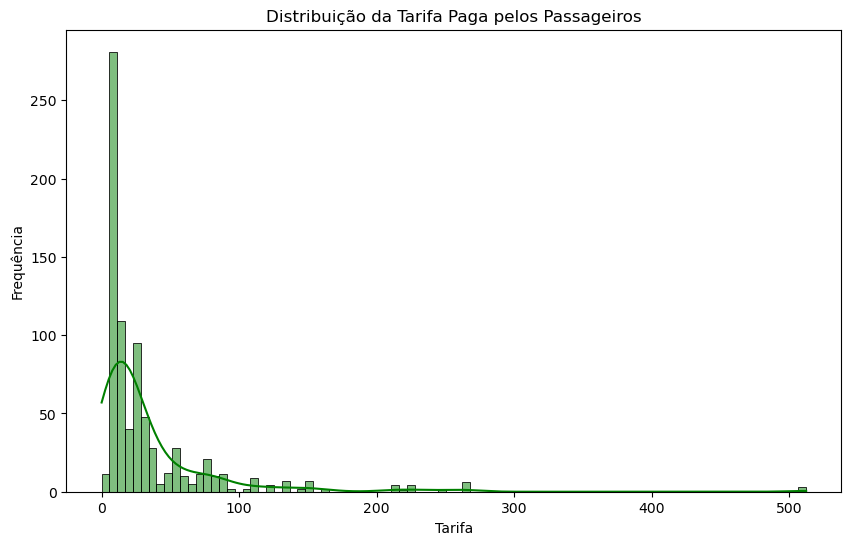

In [32]:
# Distribuição da Tarifa
plt.figure(figsize=(10, 6))
sns.histplot(titanic['fare'], kde=True, color="green")
plt.title('Distribuição da Tarifa Paga pelos Passageiros')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.show()

No gráfico a seguir, a coluna `age` é definida como eixo X e `fare` como eixo Y. A transparência dos pontos é configurada em 50% (`alpha=0.5`), o tamanho do ponto é configurado para representar a classe (quanto menor melhor), e a cor do ponto representa a sobrevivência (vermelho indica sobrevivente). Nota-se que tarifas maiores ou idades menores possuem maior aglomeração de sobreviventes.

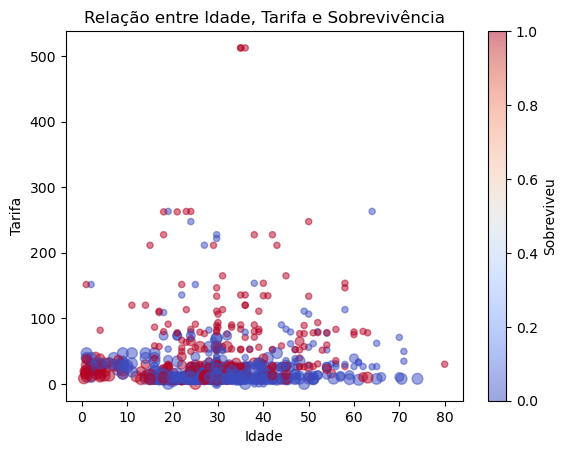

In [33]:
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5,
            s=titanic['pclass']*20,  # Tamanho do ponto baseado em pclass
            c=titanic['survived'], cmap='coolwarm')  # Cor baseada na sobrevivência
plt.colorbar(label='Sobreviveu')
plt.title('Relação entre Idade, Tarifa e Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

## Análise em Relação à Classe e Sexo dos Passageiros

Os gráficos de barras são úteis para fazer comparações entre classes. No exemplo a seguir, estamos utilizando `countplot` para gerar um gráfico em barras dos sobreviventes em relação a cada classe. Nota-se que a classe que menos sobreviveu foi a terceira.

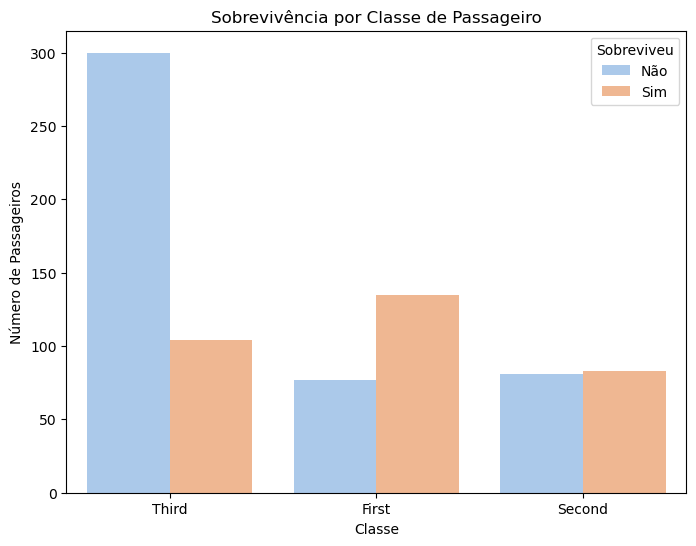

In [34]:
# Sobrevivência por Classe
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='survived', data=titanic, palette='pastel')
plt.title('Sobrevivência por Classe de Passageiro')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Outro exemplo de uso de `countplot` é dado a seguir. Neste caso, cada classe de sobrevivência (Sim ou Não) também é representada pelas cores e, no eixo X, há a separação por gênero. Nota-se que homens sobreviveram bem menos que mulheres.

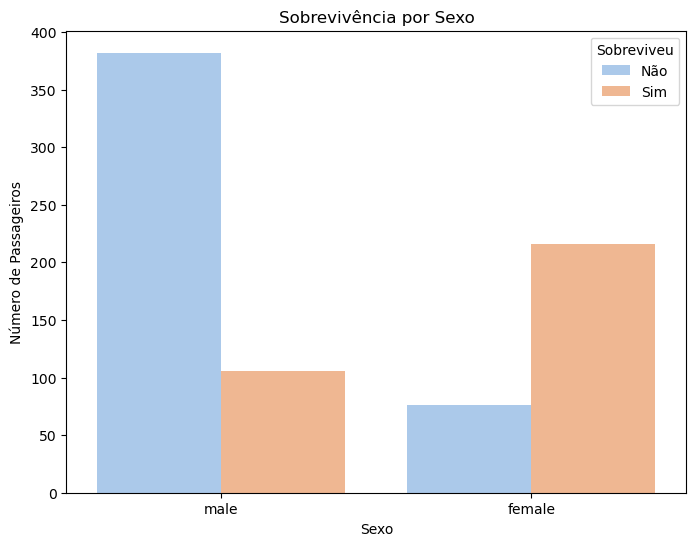

In [35]:
# Sobrevivência por Sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=titanic, palette='pastel')
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

No exemplo a seguir, utilizamos `subplots` para agrupar três gráficos de barras (`barplot`) em disposição 1x3 (uma linha e 3 colunas). A variável `axes` recebe um *array* com os três espaços a serem utilizados pelos graficos em seguida (utilizando o parametro `ax`). O primeiro apresenta a taxa de sobrevivência por classe, no segundo tem-se a taxa por sexo e, por fim, a taxa por ponto de embarque. Esse tipo de gráfico apresenta o desvio padrão por meio de uma linha na vertical em cada barra. Com isso, é possível observar, por exemplo, que o desvio padrão para o ponto de embarque em Queenstown foi maior que o desvio padrão do ponto em Southampton.

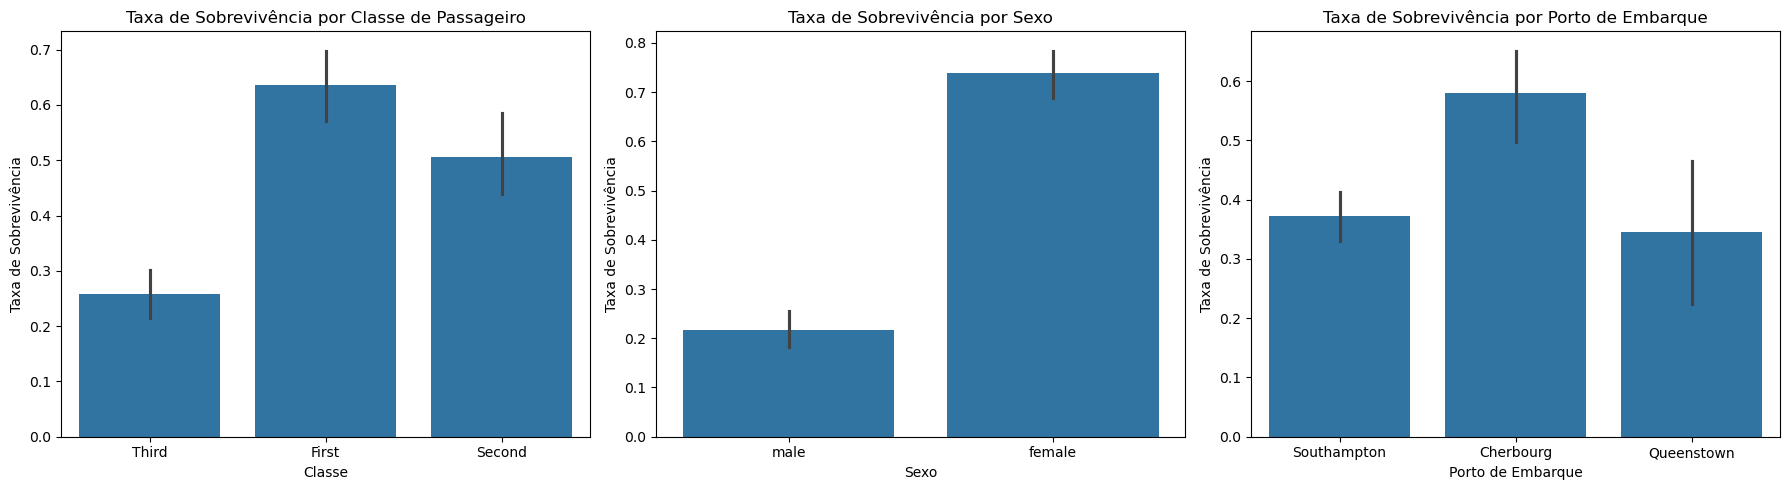

In [36]:
# Análise de proporções de sobrevivência por classe, sexo e porto de embarque
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sobrevivência por Classe
sns.barplot(x='class', y='survived', data=titanic, ax=axes[0])
axes[0].set_title('Taxa de Sobrevivência por Classe de Passageiro')
axes[0].set_ylabel('Taxa de Sobrevivência')
axes[0].set_xlabel('Classe')

# Sobrevivência por Sexo
sns.barplot(x='sex', y='survived', data=titanic, ax=axes[1])
axes[1].set_title('Taxa de Sobrevivência por Sexo')
axes[1].set_ylabel('Taxa de Sobrevivência')
axes[1].set_xlabel('Sexo')

# Sobrevivência por Porto de Embarque
sns.barplot(x='embark_town', y='survived', data=titanic, ax=axes[2])
axes[2].set_title('Taxa de Sobrevivência por Porto de Embarque')
axes[2].set_ylabel('Taxa de Sobrevivência')
axes[2].set_xlabel('Porto de Embarque')

plt.tight_layout()
plt.show()

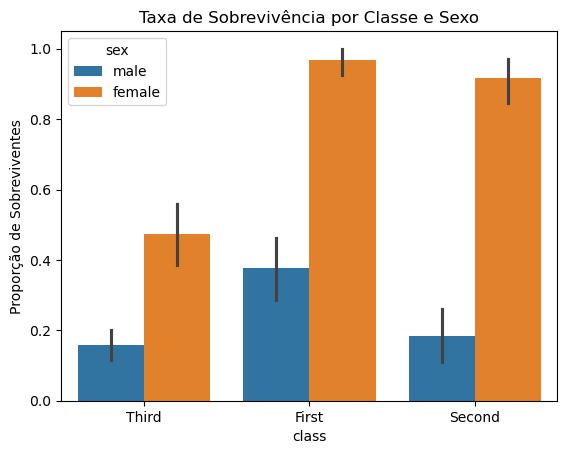

In [37]:
sns.barplot(x='class', y='survived', hue='sex', data=titanic)
plt.title('Taxa de Sobrevivência por Classe e Sexo')
plt.ylabel('Proporção de Sobreviventes')
plt.show()

## Visualizar Distribuição dos Dados (Atributos Numéricos)

No exemplo a seguir, é criado um gráfico para cada variável numérica do *dataset* (disponível em `numericos`). O método `subplots` é utilizado para criar uma disposição com uma linha e várias colunas (uma para cada coluna do *DataFrame* `numericos`). Em seguida, uma estrutura de repetição do tipo `for` percorre todas as colunas do *DataFrame*, plotando um gráfico do tipo histograma para cada uma delas. Nesse exemplo, o método `plot` do *DataFrame* foi utilizado, facilitando a construção de múltiplos gráficos.

c:\Users\saothalm\AppData\Local\miniforge3\envs\generative_ai\lib\site-packages\pandas\plotting\_matplotlib\hist.py:99: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bins = np.histogram(values, bins=bins, range=self._bin_range)


TypeError: no numeric data to plot

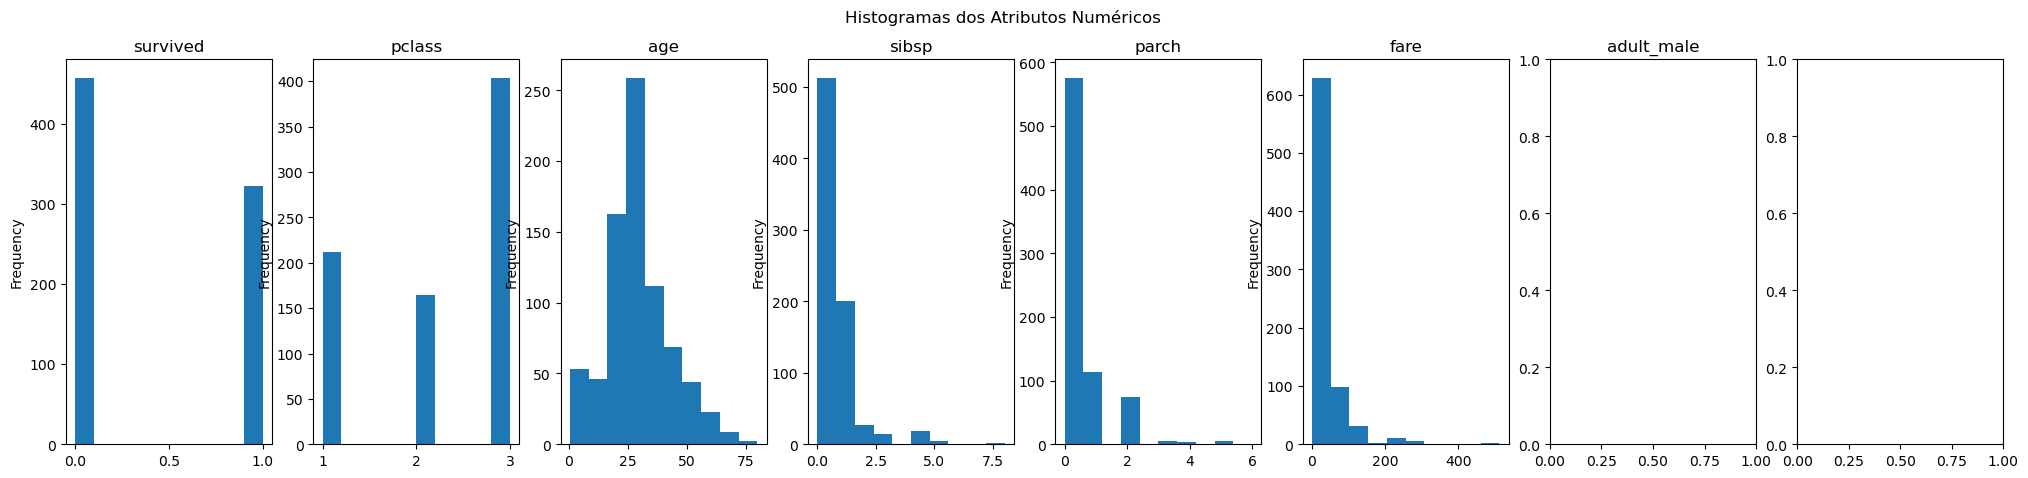

In [38]:
fig, ax = plt.subplots(ncols=len(numericos.columns), nrows=1, figsize=(25, 5))
plt.suptitle("Histogramas dos Atributos Numéricos")

# Histograma para cada atributo numérico
for i in range(0, len(numericos.columns)):
    feature = numericos.columns[i]
    ax[i].set_title(feature)
    numericos[feature].plot(kind='hist', ax=ax[i])

## Visualizar a Presença de Outliers (Atributos Numéricos)

*Outliers* são valores que diferem significativamente do resto dos dados em um conjunto de observações. Eles podem ocorrer devido a erros de medição, variações genuínas nos dados ou falhas no processo de coleta de dados. Identificar e entender *outliers* é crucial porque eles podem distorcer análises estatísticas, como médias e regressões, levando a interpretações errôneas ou conclusões enganosas. Em contextos práticos, analisar *outliers* ajuda a aprimorar os modelos, garantindo que eles sejam robustos e representativos da realidade observada, ou mesmo revelar *insights* valiosos sobre comportamentos atípicos ou casos extremos.

De maneira similar ao exemplo anterior, no código a seguir, vários graficos são organizados em uma única imagem utilizando o método `subplots`. Neste caso, são criados gráficos do tipo `boxplot` para cada coluna numérica. O parâmetro `orient='vertical'` define a orientação dos gráficos.

In [ ]:
fig, ax = plt.subplots(ncols=len(numericos.columns), nrows=1, figsize=(25, 5))
plt.suptitle("Boxplots dos Atributos Numéricos")

# Gráfico para cada atributo numérico
for i in range(0, len(numericos.columns)):
    feature = numericos.columns[i]
    sns.boxplot(numericos[feature], ax=ax[i], orient='vertical')